In [191]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

In [192]:
dataset = pd.read_csv('spam.csv')

In [193]:
dataset.shape

(5572, 5)

In [194]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [195]:
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [196]:
dataset[['v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']] = dataset[['v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']].fillna('').astype(str)
dataset['v2'] = dataset[['v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']].agg(' '.join, axis=1)
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",,,
1,ham,Ok lar... Joking wif u oni...,,,
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,,,
3,ham,U dun say so early hor... U c already then say...,,,
4,ham,"Nah I don't think he goes to usf, he lives aro...",,,


In [197]:
dataset.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [198]:
dataset.rename(columns={'v1':'Message Category', 'v2':'Message Body'}, inplace=True)
dataset.head()

,Message Category,Message Body
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [199]:
dataset['Message Category'] = [1 if cat == 'spam' else 0 for cat in dataset['Message Category']]
dataset.head()

,Message Category,Message Body
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [200]:
dataset['Message Category'].value_counts()              #1 is spam, 0 is not spam(ham)

Message Category
0    4825
1     747
Name: count, dtype: int64

In [201]:
feature = dataset['Message Body']

target = dataset['Message Category']

In [202]:
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.25, random_state=42)

In [203]:
tfidf = TfidfVectorizer(stop_words='english')

feature_train = tfidf.fit_transform(feature_train)
feature_test = tfidf.transform(feature_test)

In [204]:
model = SVC(random_state=42)
model.fit(feature_train, target_train)

model.score(feature_test, target_test)

0.9755922469490309

In [205]:
prediction = model.predict(feature_test)

In [206]:
print(classification_report(target_test, prediction))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1202
           1       0.99      0.83      0.90       191

    accuracy                           0.98      1393
   macro avg       0.98      0.91      0.94      1393
weighted avg       0.98      0.98      0.97      1393



In [207]:
conf_mat = confusion_matrix(target_test, prediction)
conf_mat

array([[1201,    1],
       [  33,  158]], dtype=int64)

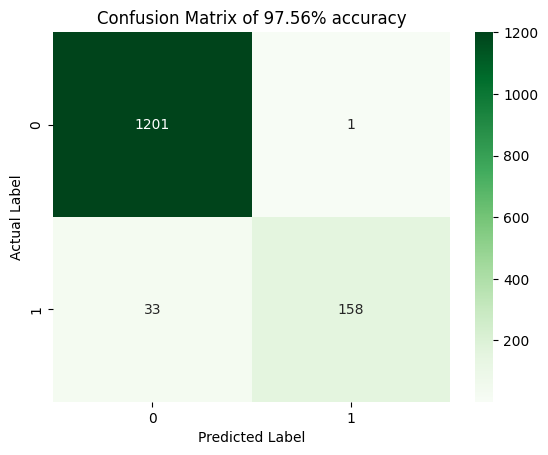

In [208]:
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title(f'Confusion Matrix of {model.score(feature_test, target_test)  * 100:.2f}% accuracy')
plt.show()